In [29]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
#loading data
data = pd.read_csv('/content/sample_data/countrydata.csv')

In [15]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [16]:
data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [17]:
#data preprocessing
data.shape

(167, 10)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [19]:
#handling missing and duplicated values
data.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [20]:
data.duplicated().any()

False

In [21]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [22]:
#feature selection (only numerical features are allowed for PCA)
features = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
X = data.loc[:, features].values
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [23]:
X.shape

(167, 9)

In [26]:
#feature scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [27]:
X.shape

(167, 9)

In [28]:
#finding the number of components
from sklearn.decomposition import PCA

variance_threshold = 0.95
pca = PCA()
pca.fit(X)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1
print("Number of components to achieve {:.0%} variance threshold: {}".format(variance_threshold, n_components))

Number of components to achieve 95% variance threshold: 6


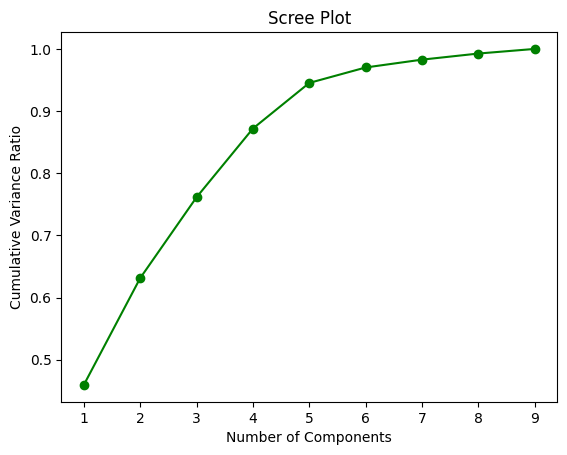

In [38]:
#visualising the same by scree plot
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, 'go-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [39]:
#PCA
pca = PCA(n_components = 6)
principal_components = pca.fit_transform(X)
principal_data = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
principal_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919


In [41]:
#Concatenating
final_data = pd.concat([data[['country']], principal_data], axis = 1)
final_data.head()

,country,PC1,PC2,PC3,PC4,PC5,PC6
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696
3,Angola,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919
